In [1]:
!pip install matplotlib numpy pandas seaborn scipy

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Graphics and plotting
import seaborn as sns  # Graphics and plotting
import scipy as sp  # Different purposes 
import re  # Data processing 

%matplotlib inline

In [3]:
df = pd.read_csv('Coffee-modified.csv')  # Read dataset 
df.head()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
df.columns  # Print all columns

Index(['ID', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [5]:
sns.set() #Set graphics style

# График топ-10 стран производителей арабики

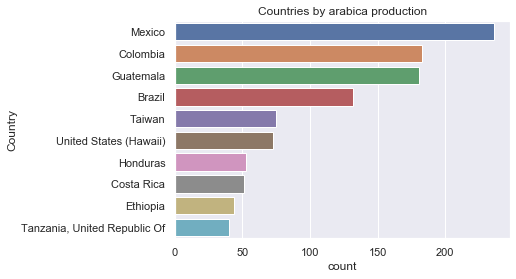

In [6]:
ax = sns.countplot(y=df['Country.of.Origin'], data=df, order=df['Country.of.Origin'].value_counts().iloc[:10].index)
ax.set_title('Сountries by arabica production');
ax.set_ylabel('Country');

Больше всего зерен арабики производит Мексика, если опираться на данные из датасета

# График высот мест произростания, используем стиль графика из ДЗ №3

(<a list of 16 Line2D thetagridline objects>,
 <a list of 8 Text thetagridlabel objects>)

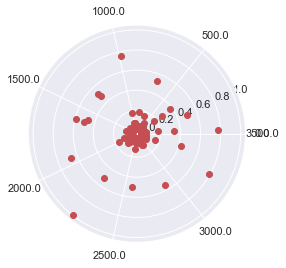

In [7]:
altitudes_sr = df['altitude_mean_meters']
altitudes_sr = altitudes_sr[altitudes_sr < 3600]
cn = pd.Series.value_counts(altitudes_sr)
cn = cn.sort_index()
theta = cn.index
r = cn.values
plt.polar(theta/max(theta)*360, r/max(r), 'or')
tk = np.linspace(0, 3500, 8)
plt.thetagrids(tk/(3500)*360, tk)

# Гистограммы запаха и цвет

In [8]:
aroma_sr = df['Aroma'].str.extract(r'(\d+.\d+)', expand=False).astype('float').dropna()
aroma_sr = aroma_sr.apply(lambda x: round(x * 5) / 5)

Text(0.5, 0, 'Points')

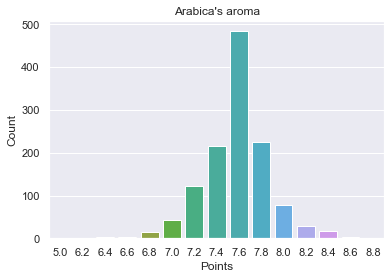

In [9]:
ax = sns.countplot(x=aroma_sr[aroma_sr < 10])
ax.set_title('Arabica\'s aroma')
ax.set_ylabel('Count')
ax.set_xlabel('Points')

Text(0.5, 0, 'Color')

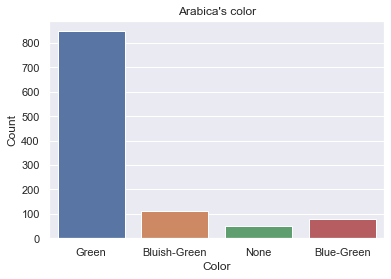

In [10]:
ax = sns.countplot(x=df['Color'])
ax.set_title('Arabica\'s color')
ax.set_ylabel('Count')
ax.set_xlabel('Color')

Как видно из гистограмм средняя оценка запаха - 7.5, самый частый цвет - зеленый.
# График корелляции запаха с оценкой качества зерна
Проверим корелляцию запаха с оценкой зерна, построим график

In [11]:
df['Cupper.Points'] = df['Cupper.Points'].str.extract(r'(\d+.\d+)', expand=False).astype('float').dropna()
df['Aroma'] = df['Aroma'].str.extract(r'(\d+.\d+)', expand=False).astype('float').dropna()

Text(0.5, 0, 'Aroma')

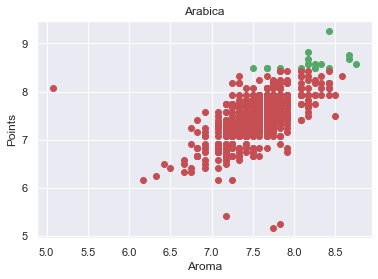

In [12]:
fig = plt.figure
ax = plt.scatter(df['Aroma'][df['Cupper.Points']>=8.5], df['Cupper.Points'][df['Cupper.Points']>=8.5], color='g')
ax1 = plt.scatter(df['Aroma'][df['Cupper.Points']<8.5], df['Cupper.Points'][df['Cupper.Points']<8.5], color='r')
plt.title('Arabica')
plt.ylabel('Points')
plt.xlabel('Aroma')

распределение очень похоже на би-нормальное (?)

# Гистограмма стран производителей зерна с оценкой > 8.5 

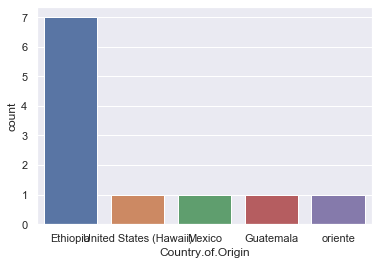

In [13]:
sns.countplot(df[df['Cupper.Points'] > 8.5]['Country.of.Origin'], 
              order=df[df['Cupper.Points'] > 8.5]['Country.of.Origin']
              .value_counts().iloc[:5].index)